<a href="https://colab.research.google.com/github/ceyhun2306/Data-Analysis/blob/main/data_analysing/F1_data_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#!/bin/bash
!kaggle datasets download julianbloise/winners-formula-1-1950-to-2025

Dataset URL: https://www.kaggle.com/datasets/julianbloise/winners-formula-1-1950-to-2025
License(s): CC-BY-SA-4.0
  0% 0.00/17.4k [00:00<?, ?B/s]
100% 17.4k/17.4k [00:00<00:00, 47.1MB/s]


In [3]:
!unzip/content/winners-formula-1-1950-to-2025.zip

/bin/bash: line 1: unzip/content/winners-formula-1-1950-to-2025.zip: No such file or directory


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/winners-formula-1-1950-to-2025.zip")
df

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950
...,...,...,...,...,...,...,...,...,...
1137,2025-06-15,North America,Canada,Circuit Gilles Villeneuve,George Russell,Mercedes,01:31:52,70.0,2025
1138,2025-06-29,Europe,Austria,Red Bull Ring,Lando Norris,McLaren,01:23:47,70.0,2025
1139,2025-07-06,Europe,Great Britain,Silverstone Circuit,Lando Norris,McLaren,01:37:15,52.0,2025
1140,2025-07-27,Europe,Belgium,Circuit de Spa Francorchamps,Oscar Piastri,McLaren,01:25:22,44.0,2025


In [6]:
df.shape

(1142, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB


In [8]:
df.describe()

,laps,year
count,1142.000000,1142.000000
mean,64.617338,1992.999124
std,20.065139,20.850097
min,1.000000,1950.000000
25%,54.000000,1977.000000
50%,64.000000,1995.000000
75%,72.000000,2011.000000
max,200.000000,2025.000000


In [9]:
df.isna().sum()

,0
date,0
continent,0
grand_prix,0
circuit,0
winner_name,0
team,0
time,0
laps,0
year,0


In [10]:
df.head(10)

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950
5,1950-07-02,Europe,France,Circuit de Reims Gueux,Juan Manuel Fangio,Alfa Romeo,02:57:52,64.0,1950
6,1950-09-03,Europe,Italy,Autodromo Nazionale di Monza,Nino Farina,Alfa Romeo,02:51:17,80.0,1950
7,1951-05-27,Europe,Switzerland,Circuit Bremgarten,Juan Manuel Fangio,Alfa Romeo,02:07:53,42.0,1951
8,1951-05-30,North America,United States,Indianapolis Motor Speedway,Lee Wallard,Kurtis Kraft Offenhauser,03:57:38,200.0,1951
9,1951-06-17,Europe,Belgium,Circuit de Spa Francorchamps,Nino Farina,Alfa Romeo,02:45:46,36.0,1951


In [11]:
df['team'].value_counts()

,count
team,
Ferrari,249
Mercedes,121
McLaren Mercedes,85
Williams Renault,64
Lotus Ford,47
...,...
Jordan Ford,1
Sauber BMW,1
Alpine Renault,1


In [12]:
df['winner_name'].value_counts().head(10)

,count
winner_name,
Lewis Hamilton,105
Michael Schumacher,91
Max Verstappen,65
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27


In [13]:
df['grand_prix'].value_counts()

,count
grand_prix,
Italy,82
Great Britain,81
United States,80
Germany,79
Monaco,71
Belgium,70
France,63
Spain,62
Canada,54


##Who are the top 10 drivers by their win rate?

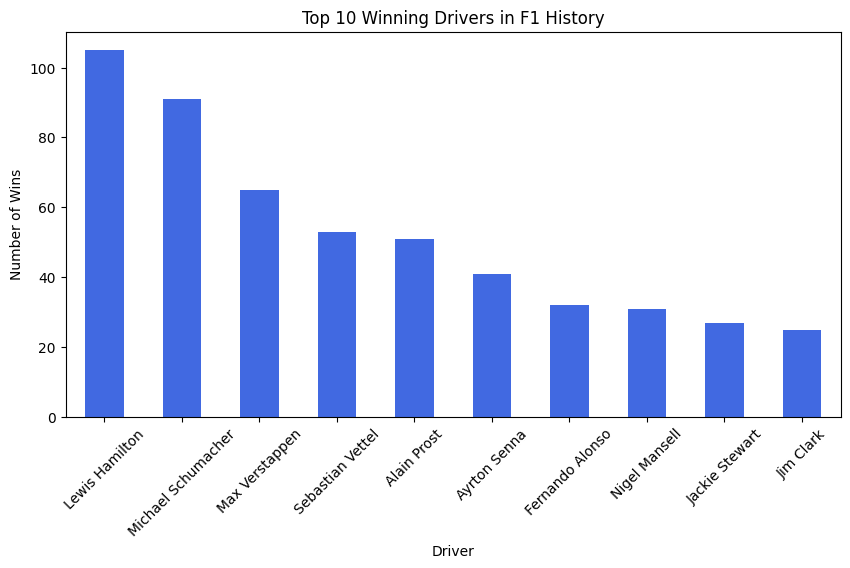

In [14]:
top_drivers = df['winner_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_drivers.plot(kind="bar", color="royalblue")
plt.xlabel("Driver")
plt.ylabel("Number of Wins")
plt.title("Top 10 Winning Drivers in F1 History")
plt.xticks(rotation=45)
plt.show()

###This chart highlights the most dominant drivers in F1 history. Lewis Hamilton and Michael Schumacher stand out far ahead of the rest, showing their consistent superiority over many seasons. Their achievements remain unmatched benchmarks in the sport.

## Top 10 teams by win

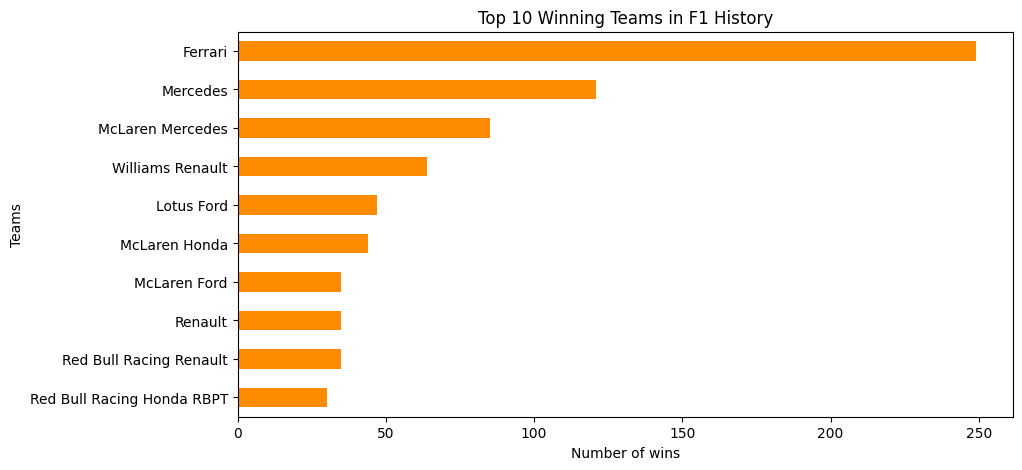

In [15]:
top_teams = df["team"].value_counts().head(10).sort_values()

plt.figure(figsize=(10, 5))
top_teams.plot(kind="barh", color="darkorange")
plt.xlabel("Number of wins")
plt.ylabel("Teams")
plt.title("Top 10 Winning Teams in F1 History")
plt.show()

###Ferrari clearly leads as the team with the most victories, solidifying its iconic role in F1 history. McLaren and Mercedes follow closely, reflecting their strong traditions in technology, strategy, and success. The rivalry among these teams has defined decades of competition.

## Number of races per year

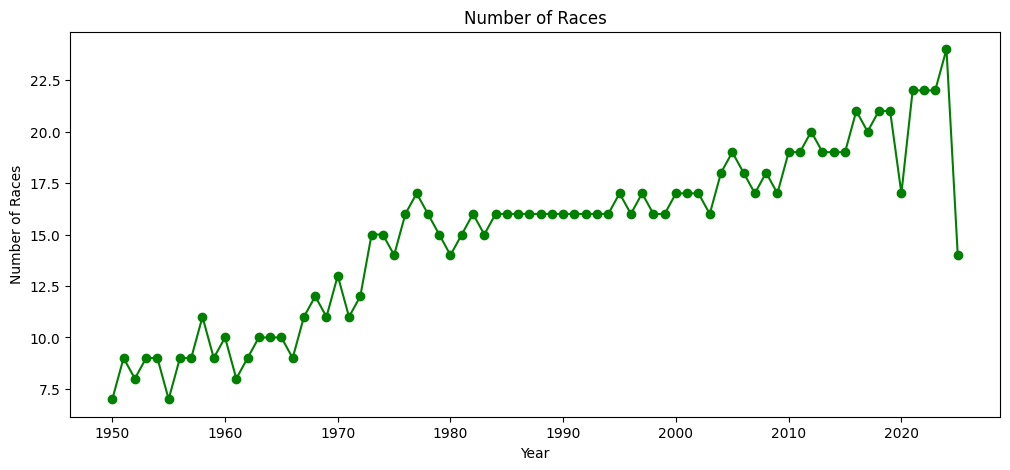

In [16]:
racer_per_year = df.groupby("year")["grand_prix"].count()

plt.figure(figsize=(12, 5))
plt.plot(racer_per_year.index, racer_per_year.values, marker="o", color="green" )
plt.title("Number of Races")
plt.ylabel("Number of Races")
plt.xlabel("Year")
plt.show()

###In the early years, only a limited number of races were held, but the chart shows a sharp increase over time. This growth reflects both the rising popularity of the sport and the expansion of the F1 calendar. Today, the championship features record numbers of races each season.

##Unique winners per year

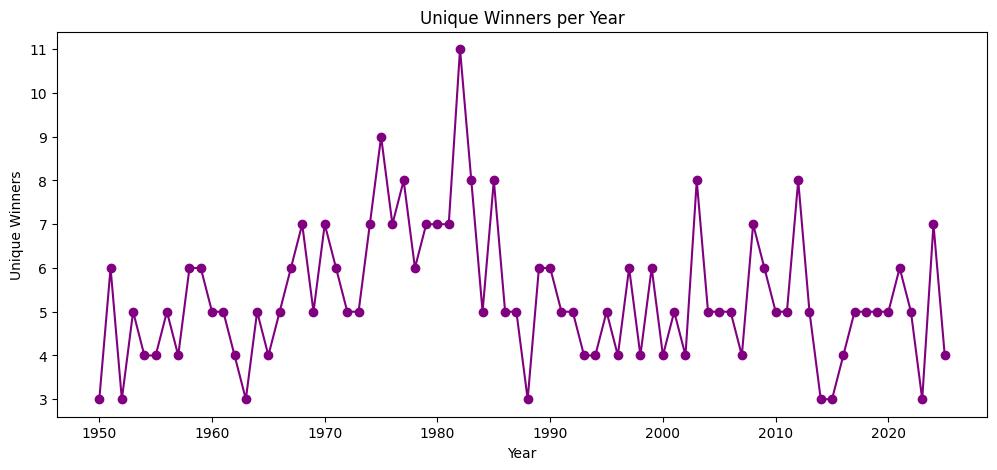

In [17]:
unique_winners_per_year = df.groupby("year")["winner_name"].nunique()

plt.figure(figsize=(12,5))
plt.plot(unique_winners_per_year.index, unique_winners_per_year.values, marker="o", color="purple")
plt.xlabel("Year")
plt.ylabel("Unique Winners")
plt.title("Unique Winners per Year")
plt.show()

###Some seasons were dominated by just one or two drivers who won nearly all the races. Other years saw a wide variety of winners, indicating stronger competition. These shifts show how different eras of F1 have been shaped by varying levels of dominance.

##Distribution of races by continent

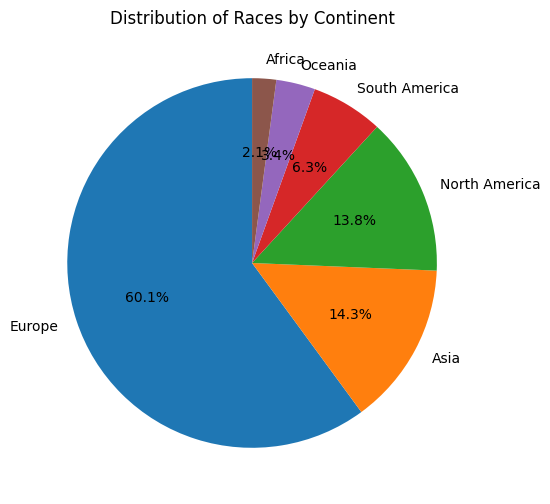

In [19]:
continent_counts = df["continent"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Races by Continent")
plt.show()


###The majority of races have been held in Europe, as F1’s roots are deeply tied to European motorsport. Over time, however, North America, Asia, and other continents have become part of the championship. This distribution reflects the global growth of Formula 1.

##Teams with the most unique winning drivers

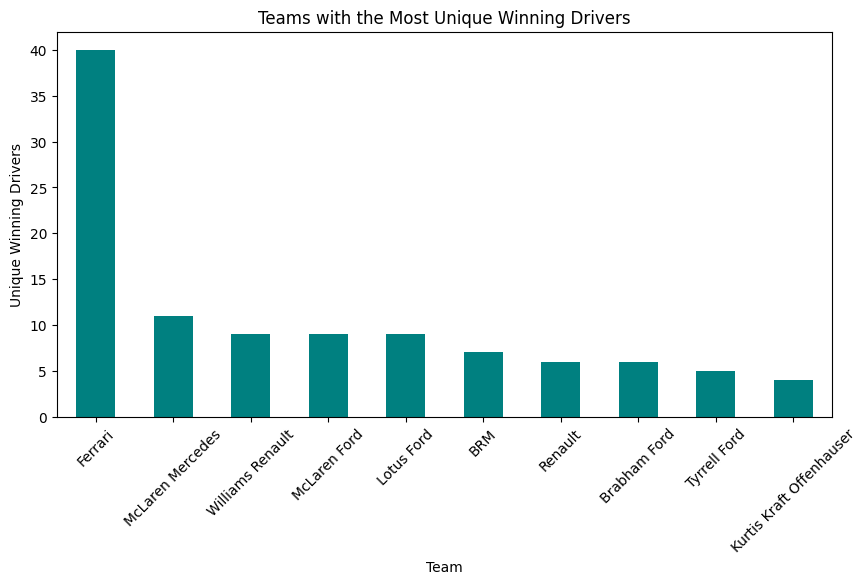

In [20]:
drivers_per_team = df.groupby("team")["winner_name"].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
drivers_per_team.plot(kind="bar", color="teal")
plt.xlabel("Team")
plt.ylabel("Unique Winning Drivers")
plt.title("Teams with the Most Unique Winning Drivers")
plt.xticks(rotation=45)
plt.show()


###Teams like Ferrari and McLaren have achieved victories with a wide range of different drivers. This demonstrates their ability to maintain success across generations, independent of a single star driver. It highlights the strength of the team as a whole.

##Most frequently held Grand Prix races

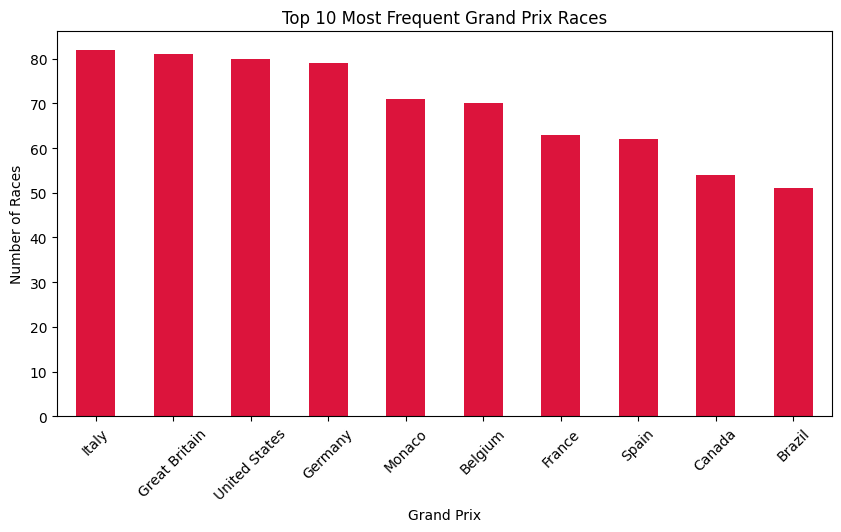

In [21]:
gp_wins = df["grand_prix"].value_counts().head(10)

plt.figure(figsize=(10,5))
gp_wins.plot(kind="bar", color="crimson")
plt.xlabel("Grand Prix")
plt.ylabel("Number of Races")
plt.title("Top 10 Most Frequent Grand Prix Races")
plt.xticks(rotation=45)
plt.show()


###The Monaco and Monza Grands Prix are among the most frequently repeated events in F1. Their historical significance and unique track characteristics make them staples of the calendar. Their longevity reflects the tradition and prestige of Formula 1.

##Number of races per decade

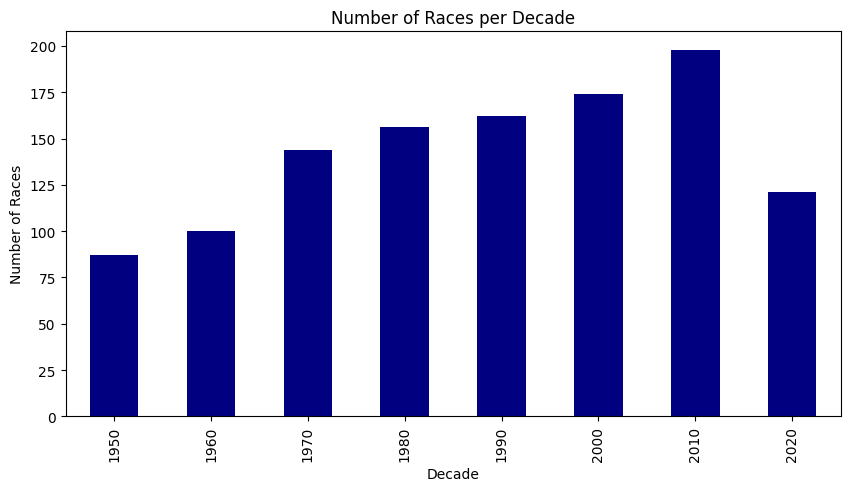

In [22]:
df["decade"] = (df["year"] // 10) * 10
races_per_decade = df.groupby("decade")["grand_prix"].count()

plt.figure(figsize=(10,5))
races_per_decade.plot(kind="bar", color="navy")
plt.xlabel("Decade")
plt.ylabel("Number of Races")
plt.title("Number of Races per Decade")
plt.show()


###Since the 1950s, the number of races held each decade has increased significantly. This trend shows how F1 grew from a small European championship into a global phenomenon. Modern decades feature record-breaking race calendars.

##Win share of the top 5 drivers

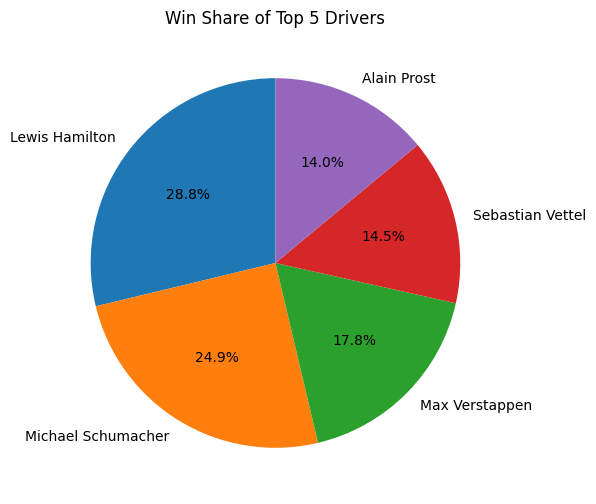

In [23]:
top5_drivers = df["winner_name"].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(top5_drivers, labels=top5_drivers.index, autopct='%1.1f%%', startangle=90)
plt.title("Win Share of Top 5 Drivers")
plt.show()


###The top five drivers account for a substantial share of all F1 wins. Their dominance illustrates how individual talent combined with strong teams can shape entire eras of the sport. These legends have left a lasting impact on the history of Formula 1

##Average race laps by decade

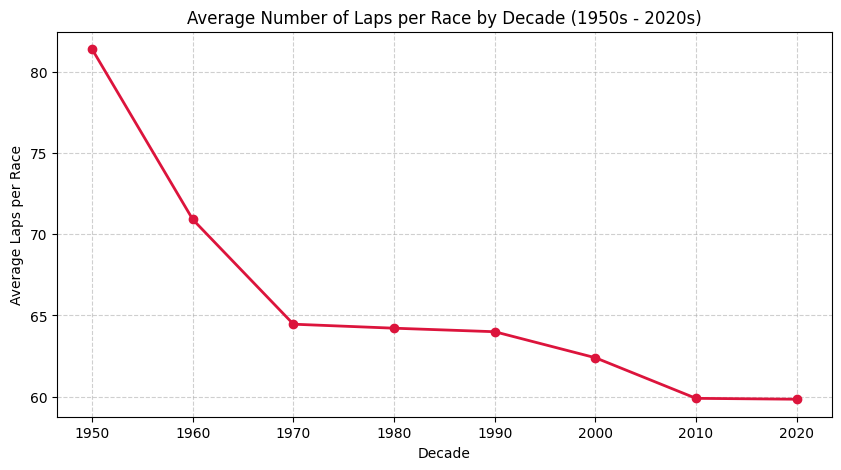

In [25]:
df["decade"] = (df["year"] // 10) * 10

avg_laps_decade = df.groupby("decade")["laps"].mean()


plt.figure(figsize=(10,5))
plt.plot(avg_laps_decade.index, avg_laps_decade.values, marker="o", color="crimson", linewidth=2)
plt.xlabel("Decade")
plt.ylabel("Average Laps per Race")
plt.title("Average Number of Laps per Race by Decade (1950s - 2020s)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

###Over the decades, the average number of laps per Formula 1 race has shown notable fluctuations. This reflects how circuits, safety regulations, and race formats have evolved — some decades favoring longer races with more laps, while others introduced shorter formats to adapt to modern racing standards and year by year this number has decreased.

##Best Drivers of the Last 10 Years

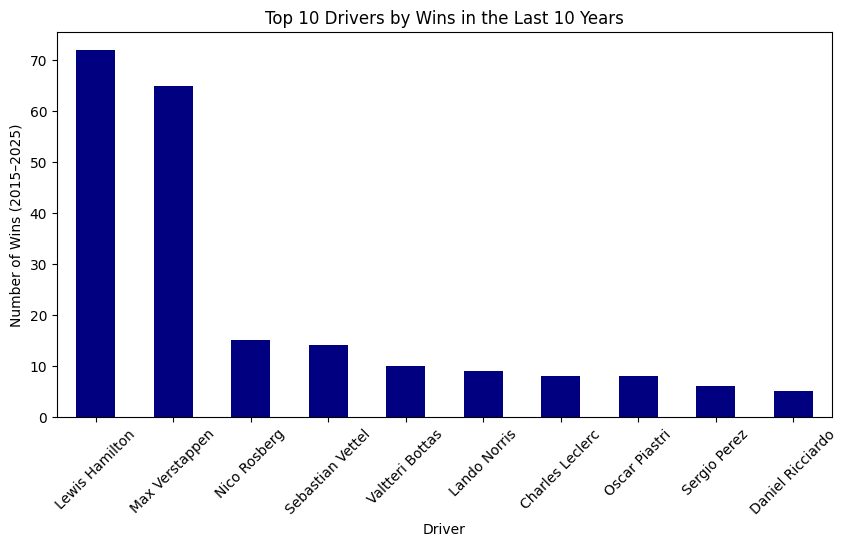

In [26]:
last_10_years = df[df["year"] >= 2015]

top_drivers_last10 = last_10_years["winner_name"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_drivers_last10.plot(kind="bar", color="navy")
plt.xlabel("Driver")
plt.ylabel("Number of Wins (2015–2025)")
plt.title("Top 10 Drivers by Wins in the Last 10 Years")
plt.xticks(rotation=45)
plt.show()


###This chart highlights the dominant drivers of the last decade. Lewis Hamilton and Max Verstappen clearly stand out, reflecting their era-defining battles and consistency. Their performance demonstrates how modern F1 has been shaped by their exceptional talent and strong teams.

##Overall conclusion.

###The full dataset paints a rich picture of Formula 1’s evolution from its early European roots to its modern global stage. Over the decades, the sport has grown in scale, with more races per season, expanded continents, and increasingly competitive grids. Legendary drivers like Fangio, Schumacher, Hamilton, and Verstappen have defined different eras, while iconic teams such as Ferrari, McLaren, Mercedes, and Red Bull have remained central forces. The analysis shows not only who dominated but also how the format, circuits, and strategies of F1 have changed, reflecting both tradition and innovation in the world’s most prestigious motorsport.